#### Question 1

We have used a Gibbs sampler to estimate the marginal distribution generated from the conditional distributions:

$p(x|y) \propto ye^{-yx}$, $0 < x < B < \infty$

$p(y|x) \propto xe^{-yx}$, $0 < y < B < \infty$ where B is a known positive constant.


First, we have used initial values of $x$ and $y$ to be random numbers generated from Uniform[0, B].
Then, we have created a T x 3 matrix called *chain* filled with zeros, where T = number of iterations.


Since the marginal conditional density function of $x|y$, $p(x|y) \propto ye^{-yx}$ and the range of $x$ is from 0 to B, 
the cumulative density function of $x|y$, $F(x|y) = \frac{\int_0^x ye^{-yx}\;{d}x}{\int_o^B ye^{-yx}\;{d}x}$.

Note that the conditional density function of $x|y$ follows the exponential distribution.
Then, $F(x|y) = \frac{\int_0^x ye^{-yx}\;{d}x}{\int_o^B ye^{-yx}\;{d}x} = \frac{1 - e^{-yx}}{1 - e^{-yB}}$.

For Inverse Transform Sampling, we have first generated $u$ from Uniform[0, B] and let $u = F(x|y)$.
Solving for $x$, we have $x = -\frac{1}{y}ln(1 - u(1 - e^{-yB}))$.

Similarly, we have generated $v$ from Uniform[0, B] and used Inverse Transform Sampling.
Let $v = F(y|x) = \frac{\int_0^y xe^{-yx}\;{d}y}{\int_o^B xe^{-yx}\;{d}y} = \frac{1 - e^{-yx}}{1 - e^{-xB}}$.
Solving for $y$, we have $y = -\frac{l}{x}ln(1 - v(1 - e^{-xB}))$.

The first column of *chain* will represent the number of iterations.
From each iteration of the sampler, we have stored value of $x$ into the second column of *chain* and value of $y$ into the third column of *chain*.

Finally, this function returns the matrix *chain* with stored $x$ and $y$ values.

Please note that we have not included thinning process in this function.

The algorithm is as follows:

In [16]:
%matplotlib inline
import random, math
from math import *
from random import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

def gibbs(B, T):
    x = float(np.random.uniform(0, B, 1))
    y = float(np.random.uniform(0, B, 1))
    chain = np.zeros((T, 3))
    chain[:, 0] = range(1, T + 1)
    for i in range(T):
        u = float(np.random.uniform(0, 1, 1))
        v = float(np.random.uniform(0, 1, 1))
        x = -np.log(1 - u * (1 - np.exp(-y * B))) / y
        y = -np.log(1 - v * (1 - np.exp(-x * B))) / x
        chain[i, 1] = x
        chain[i, 2] = y
    return(chain)

#### Question 2

Histograms of values for $x$, for B = 5 and for sample sizes T = 500, 5000, 50000 are as follows:

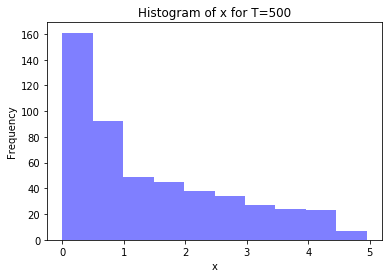

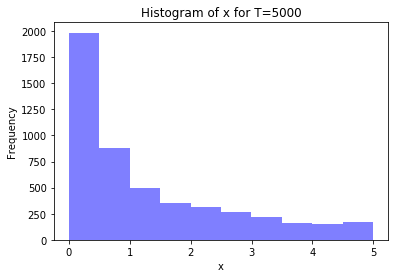

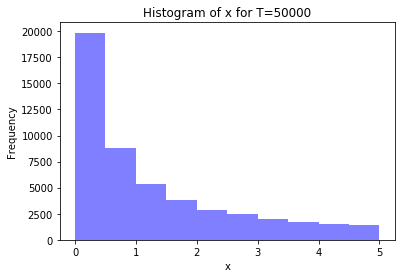

In [17]:
G1 = gibbs(B = 5, T = 500)
G2 = gibbs(B = 5, T = 5000)
G3 = gibbs(B = 5, T = 50000)

xx = G1[:,1]
x2 = G2[:,1]
x3 = G3[:,1]

n,bins,patches = plt.hist(xx, facecolor='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title(r'Histogram of x for T=500')
plt.show()

n,bins,patches = plt.hist(x2, facecolor='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title(r'Histogram of x for T=5000')
plt.show()

n,bins,patches = plt.hist(x3, facecolor='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title(r'Histogram of x for T=50000')
plt.show()

#### Question 3

An estimate of the expectation of $X$, $\mathbb{E}_{p(X)}[X]$, by using the 500, 5000, and 50000 samples from the sampler is as follows:

In [18]:
print("Estimate of the expectation for T = 500:", round(mean(xx), 4))
print("Estimate of the expectation for T = 5000:", round(mean(x2), 4))
print("Estimate of the expectation for T = 50000:", round(mean(x3), 4))

Estimate of the expectation for T = 500: 1.4445
Estimate of the expectation for T = 5000: 1.2969
Estimate of the expectation for T = 50000: 1.2673
